In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Cuisine_rating.csv')

In [ ]:
########################## DATA UNDERSTANDING & FEATURE EXTRACTION ################################################

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# CHECKING & TREATING FOR NULL VALUES

In [ ]:
df.isna().sum()

In [ ]:
for col in df.columns:
    for row in df.index:
     if df[col][row] == 'unknown':
      #print(df[col][row])            # will only print those cells of df where unknow is written
      df[col][row] = np.nan

In [ ]:
# PRINTING TEXTUAL AND NUMERIC COLUMNS SEPARATELY

In [ ]:
txCol = df.select_dtypes(include = ['object']).columns
print("Textual columns are : ", txCol)

numCol = df.select_dtypes(include = np.number).columns
print("Numeric columns are: ", numCol)

In [ ]:
df.nunique()                # checking number of unique values in every column

In [ ]:
df['Marital Status'].unique()   # checking unique values for Marital status column

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
########################## DATA ANALYSIS ################################################

In [ ]:
# CALCULATE AGE OF USERS & ADDING AGE COLUMN TO DATAFRAME

In [ ]:
from datetime import date
date.today().year
ageData = date.today().year - df['YOB']
df.insert(5,'Age',ageData)

In [ ]:
# CATEGORIZING USERS BASED ON THEIR AGE
#  age < 12 is child, age < 20 is teenager, age < 50 is adult and above are SeniorCitizens

In [ ]:
catData = []
for a in df['Age']:
  if  a >= 0 and a <= 12:
    catData.append('Child')
  elif a < 20:
    catData.append('Teenager')
  elif a <= 50:
    catData.append('Adult')
  else:
    catData.append('SeniorCitizen')

df.insert(6, 'AgeCategory', catData)

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
df.to_csv("MyCuisinefile.csv")

In [ ]:
# WHICH AGE PEOPLE LIKE WHICH CUISINE ? OR WHICH AGE_GROUP OF PEOPLE LIKE WHICH CUISINE?

In [ ]:
gk = df.groupby(['AgeCategory', 'Cuisines'])
gk.groups               # shows all possible groups and UserID falling in above group
gk.groups.keys()        # shows only possible groups
for a,c in gk.groups.keys():
  count = gk.get_group((a,c)).count()['User ID']
  print(count, a, "like ", c)

  # STAKED COLUMN CHART

In [ ]:
# WHICH CUISINE IS MOSTLY LIKED BY ADULTS, TEENAGERS & SENIOR CITIZENS

In [ ]:
df_1 = pd.DataFrame(columns = ['Count','AgeCat','Cuisine'])
for ag,cu in gk.groups.keys():
  count1 = gk.get_group((ag,cu)).count()['User ID']
  df_1.loc[len(df_1)] = [count1,ag,cu]

for category in df_1['AgeCat'].unique():
  maximum = df_1['Count'][df_1['AgeCat'] == category].max()
  print(df_1[(df_1['Count'] == maximum) & (df_1['AgeCat'] == category)])

   Count AgeCat Cuisine
2     24  Adult  French
    Count         AgeCat   Cuisine
8      10  SeniorCitizen  Filipino
10     10  SeniorCitizen    Indian
12     10  SeniorCitizen  Japanese
    Count    AgeCat   Cuisine
18     10  Teenager  Japanese


In [ ]:
# SHOW NUMBER OF PEOPLE LIKE EACH CUISINE

In [ ]:
for cs in df['Cuisines'].unique():
  cn = df[df['Cuisines'] == cs].count()['User ID']
  print(cs, "is like by ", cn, "people")

Japanese is like by  36 people
Indian is like by  32 people
Seafood is like by  22 people
Filipino is like by  34 people
Italian is like by  18 people
Chinese is like by  24 people
French is like by  34 people


In [ ]:
# WHICH CUISINE HAS HIGHEST FOOD RATING?
# as the highest food rating is 5, so we'll count which cuisine has got maximum number of 5's

In [ ]:
maxStar = 0
mCus = ""
for ucs in df['Cuisines'].unique():
  fCount =df[(df['Cuisines'] == ucs) & (df['Food Rating'] ==5)].count()['User ID']
  #print(ucs, "got ", fCount, "5stars Rating")  # printing number of 5 start rating for every cuisine
  if fCount > maxStar:
    maxStar = fCount
    mCus = ucs

print(mCus, "got maximum 5 star rating", maxStar)

In [ ]:
# PERCENTAGE OF MALES & FEMALES VISINTING THE RESTAURANTS

In [ ]:
mCount = (df[df['Gender'] == 'Male'].count()['User ID'])/len(df)*100
print(mCount, "males visited restaurent")
fCount = (df[df['Gender'] == 'Female'].count()['User ID'])/len(df)*100
print(fCount, "females visited restaurent")

In [ ]:
# ON WHICH CUISINE MAXIMUM BUDGET IS SPENT ON ?

In [ ]:
maxb = 0
maxCuis = []
for unicuis in df['Cuisines'].unique():
 bn = df['Budget'] [df['Cuisines'] == unicuis].sum()
 print(unicuis, "has budget spent on ", bn)
 if bn >= maxb:
  maxb = bn
  maxCuis.append(unicuis)
print(maxb, "was the maximum budget spent on ", maxCuis)

In [ ]:
# WHO SPENT THE HIGHEST BUDGET ON RESTAURANT ? STUDENTS/ PROFESSIONAL?

In [ ]:
mx_Res_bud = 0
person = ""
for pro in df['Activity'].unique():
  budget = df['Budget'][df['Activity'] == pro].sum()
  print(pro, "spent", budget, "on restaurent")
  if budget > mx_Res_bud:
    mx_Res_bud = budget
    person = pro
print(person, "spent maximum budget of ", mx_Res_bud, "on restaurent")

Professional spent 310 on restaurent
Student spent 453 on restaurent
Student spent maximum budget of  453 on restaurent


In [ ]:
# WHO IS MOSTLY VISITING RESTUARANT? SINGLE STUDENTS? MARRIED STUDENTS......SINGLE PROFESSIONAL, DIVORCED PROFESSIONALS?

In [ ]:
gkk = df.groupby(['Marital Status', 'Activity'])
gkk.groups.keys()
group = " "
maxUser = 0
for g,k in gkk.groups.keys():
  #print(g,k)
  countUser = gkk.get_group((g,k)).count()['User ID']
  print(countUser,g,k, "visti restaurent")
  if countUser > maxUser:
    maxUser = countUser
    group = g,k

print()
print(maxUser, group, " visit restaurent")

8 Divorced Professional visti restaurent
6 Divorced Student visti restaurent
36 Married Professional visti restaurent
50 Married Student visti restaurent
36 Single Professional visti restaurent
64 Single Student visti restaurent

64 ('Single', 'Student')  visit restaurent


In [ ]:
########################################################### DATA VISUALISATION ###############################################################

<BarContainer object of 7 artists>

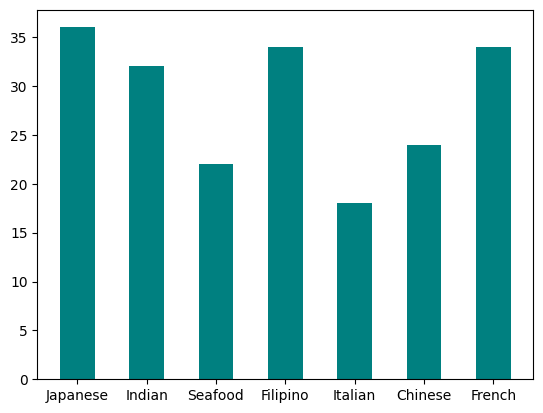

In [ ]:
# SHOW NUMBER OF PEOPLE LIKE EACH CUISINE
cnl = []
for cs in df['Cuisines'].unique():
  cn = df[df['Cuisines'] == cs].count()['User ID']
  cnl.append(cn)
plt.bar(df['Cuisines'].unique(),cnl, width = 0.5, color = 'teal')

Text(0.5, 1.0, 'Food Rating by Cuisines ')

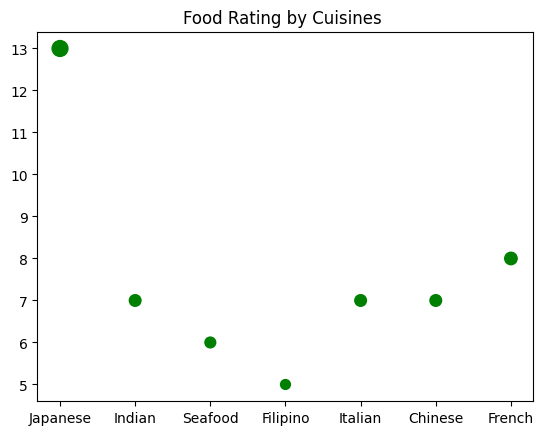

In [ ]:
# SHOW 5 STAR FOOD RATING FOR EACH CUISINE
fCount = []
for ucs in df['Cuisines'].unique():
  ratCount =df[(df['Cuisines'] == ucs) & (df['Food Rating'] ==5)].count()['User ID']
  fCount.append(ratCount)
  #print(ucs, "got ", ratCount, "5stars Rating")  # printing number of 5 start rating for every cuisine


#plt.scatter(df['Cuisines'].unique(), fCount, s = fCount, color = 'green')  # AS the value for y is small , so dots are appearing small , we can enlarge dots by giving size array as following
sArry = []
for i in fCount:
  sArry.append(i*10)
plt.scatter(df['Cuisines'].unique(), fCount, s = sArry, color = 'green')
plt.title(" 5 Stars Food Rating by Cuisines ")

118 males visited restaurent
82 females visited restaurent


Text(0.5, 1.0, 'Percentage of Males & Females visiting Restaurent')

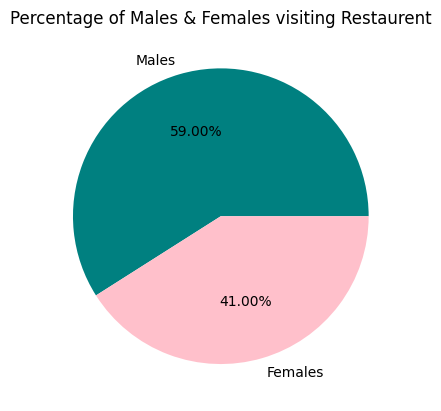

In [ ]:
# SHOW PERCENTAGE OF MALES & FEMALES VISITING RESTAURANT
mCount = df[df['Gender'] == 'Male'].count()['User ID']
print(mCount, "males visited restaurent")
fCount = df[df['Gender'] == 'Female'].count()['User ID']
print(fCount, "females visited restaurent")
plt.pie([mCount,fCount], labels=['Males','Females'],autopct='%1.2f%%',colors=['teal','pink'])
plt.title('Percentage of Males & Females visiting Restaurent')

Text(0.5, 1.0, 'Budget spendings on Cuisines')

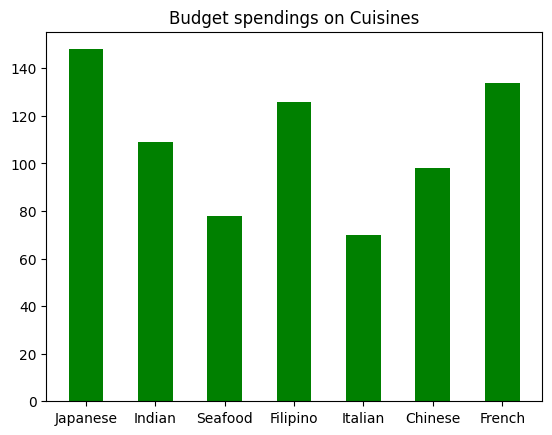

In [ ]:
# SHOW  CUISINE WISE BUDGET SPENT?
bn = []
for unicuis in df['Cuisines'].unique():
 bnCount = df['Budget'] [df['Cuisines'] == unicuis].sum()
 bn.append(bnCount)
 ##print(unicuis, "has budget spent on ", bn)
plt.bar(df['Cuisines'].unique(), bn, width = 0.5, color = 'green')
plt.title('Budget spendings on Cuisines')

310 453


Text(0.5, 1.0, 'Percentage of Cusines budget coming from Professionals & Students')

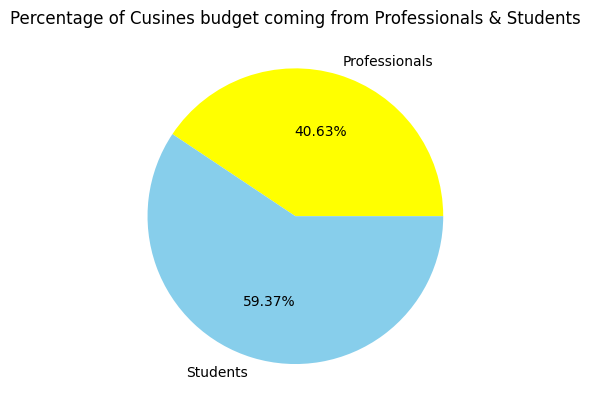

In [ ]:
# Percentage of budget spent by professionals & students
professional_B = df['Budget'][df['Activity'] == 'Professional' ].sum()
stud_B = df['Budget'][df['Activity'] == 'Student' ].sum()
print(professional_B, stud_B)
plt.pie([professional_B, stud_B], labels = ['Professionals', 'Students'], autopct ='%1.2f%%', colors = ['yellow', 'skyblue'])
plt.title('Percentage of Cusines budget coming from Professionals & Students')


['Teenager' 'Adult' 'SeniorCitizen']


Text(0.5, 1.0, 'Percentage of People visiting Restaurants')

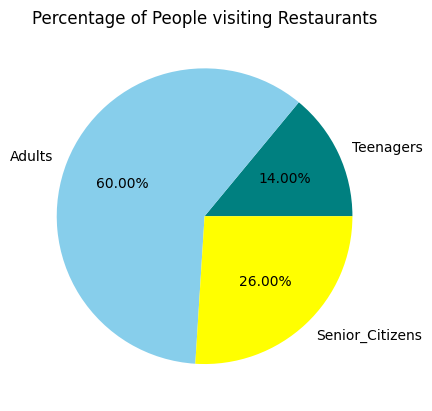

In [ ]:
# SHOW AGE-WISE RESTAURANT VISIT
df.columns
print(df['AgeCategory'].unique())
teen = df[df['AgeCategory'] == 'Teenager'].count()['User ID']
adult = df[df['AgeCategory'] == 'Adult'].count()['User ID']
Scitizen = df[df['AgeCategory'] == 'SeniorCitizen'].count()['User ID']
plt.pie([teen, adult, Scitizen], labels = ['Teenagers', 'Adults', 'Senior_Citizens'], autopct = '%1.2f%%', colors = ['teal','skyblue','yellow'])
plt.title('Percentage of People visiting Restaurants')

Text(0.5, 1.0, 'Category wise Restaurant Visits')

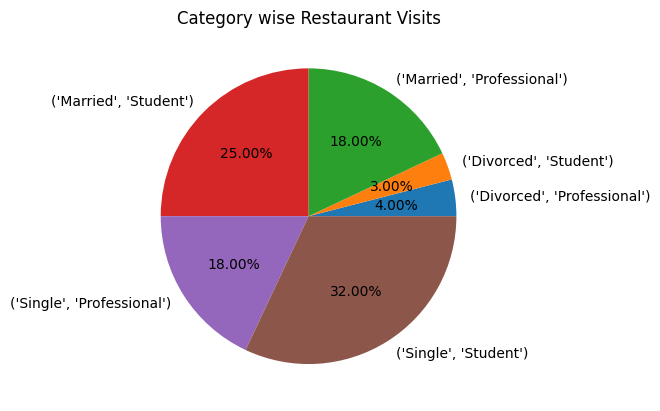

In [ ]:
#SHOW PERCENTAGE OF PEOPLE OF EACH CATEGORY VISITING RESTAURANTS
gkk = df.groupby(['Marital Status', 'Activity'])
keylist = gkk.groups.keys()
userList = []
for g,k in gkk.groups.keys():
  countUser = gkk.get_group((g,k)).count()['User ID']
  userList.append(countUser)
plt.pie(userList, labels = keylist, autopct = '%1.2f%%')
plt.title('Category wise Restaurant Visits')